# What kind of doggo is that? Classifying Dog Breeds using Convolutional Neural Networks

## Task 3: Dataset Preprocessing

In this task, we will highlight some fundamentals behind machine learning models, and start using some common approaches to preprocess our data such that it can plug into a model pipeline quite easily.

In [14]:
import tensorflow as tf
import glob

import matplotlib
%matplotlib inline
# %config InlineBackend.figure_format = 'svg'
matplotlib.rcParams['figure.dpi'] = 300
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [15]:
filenames = glob.glob('Data/*/*.jpg')

In [16]:
labels = [x.split('/')[1] for x in filenames]

In [17]:
def reshape_rescale_image(image, height=120, width=120):
    image = tf.cast(image, tf.float32)/255.
    image = tf.image.resize_with_pad(image, target_height=height, target_width=width)
    return image

def parse_image(file_path):
    label = tf.strings.split(file_path, os.sep)[-2]
    image = tf.io.decode_image(tf.io.read_file(file_path), channels=3)
    image.set_shape([None, None, 3])
    return reshape_rescale_image(image)

In [18]:
def plot_image(image, title, ax):
    ax.imshow(image)
    ax.set_title(title)
    ax.grid(False)

def compare(original, processed):
    fig, axes = plt.subplots(1, 7, figsize=(12, 8))

    ax = axes.ravel()[0]
    plot_image(original, 'Original', ax)
    
    ax = axes.ravel()[1]
    plot_image(processed, 'Processed', ax)
    
    
    image_contrast = tf.keras.layers.experimental.preprocessing.RandomContrast(0.9)(processed[None, :], training=True)
    image_flip = tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal')(processed[None, :], training=True)
    image_rotate = tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)(processed[None, :], training=True)
    image_dropout = tf.keras.layers.Dropout(0.1)(processed[None, :], training=True)
    
    full = tf.keras.layers.experimental.preprocessing.RandomContrast(0.9)(processed[None, :], training=True)
    full = tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal')(full, training=True)
    full = tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)(full, training=True)
    full = tf.keras.layers.Dropout(0.1)(full, training=True)
    
    ax = axes.ravel()[2]
    plot_image(tf.clip_by_value(tf.squeeze(image_contrast), 0, 1), 'Random contrast', ax)
    
    ax = axes.ravel()[3]
    plot_image(tf.clip_by_value(tf.squeeze(image_flip), 0, 1), 'Random flip', ax)
    
    ax = axes.ravel()[4]
    plot_image(tf.clip_by_value(tf.squeeze(image_rotate), 0, 1), 'Random rotation', ax)
    
    ax = axes.ravel()[5]
    plot_image(tf.clip_by_value(tf.squeeze(image_dropout), 0, 1), 'Dropout', ax)

    
    ax = axes.ravel()[6]
    plot_image(tf.clip_by_value(tf.squeeze(full), 0, 1), 'Full preprocessing', ax)

    
    plt.tight_layout()

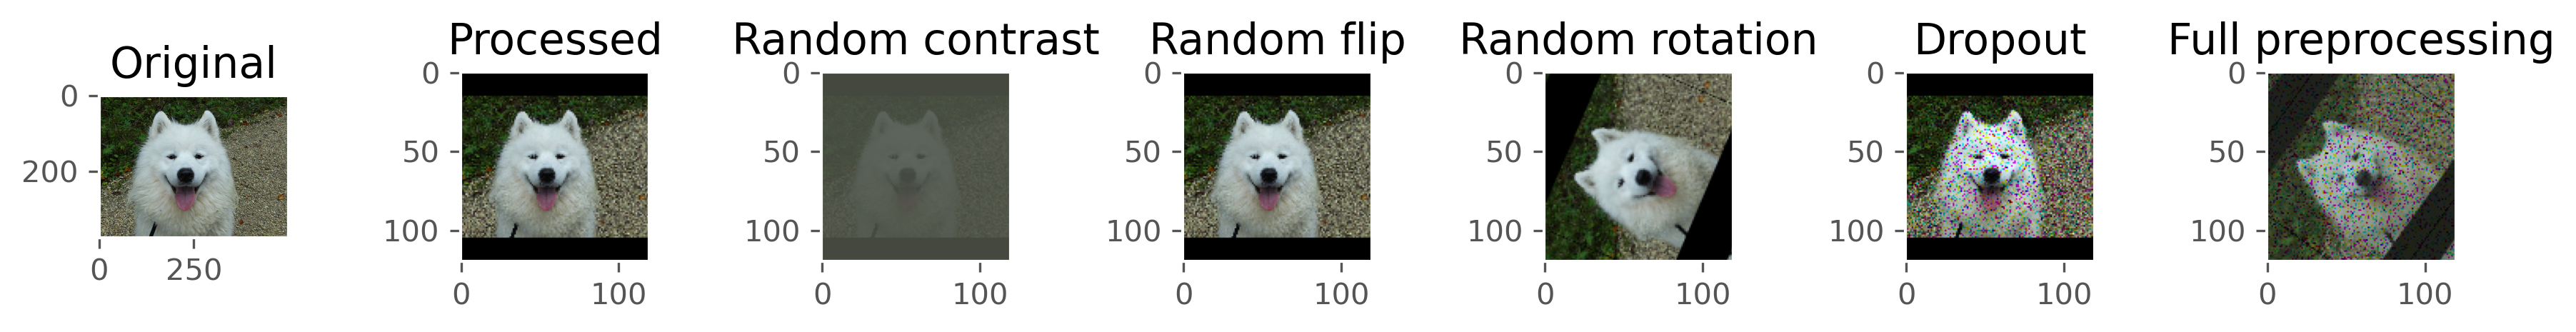

In [19]:
sample_path = 'Data/samoyed/samoyed_103.jpg'

original = tf.io.decode_image(tf.io.read_file(sample_path), channels=3)
processed = parse_image(sample_path)
compare(original, processed)

plt.savefig('demo.')